In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.11.0
TFP version: 0.19.0


In [2]:
# Additional imports and setting fixed random seed to have reproducibility

import matplotlib.pyplot as plt
import numpy as np
tf.random.set_seed(123)

# Tensorflow Distributions

***
## Univariate distributions
<a id='univariate_distributions'></a>

In [3]:
# Create a normal distribution from Tensorflow Distributions

normal = tfd.Normal(loc=0,scale=1)

In [4]:
# Sample from the chosen distribution...

normal.sample(1)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.8980837], dtype=float32)>

In [5]:
# ... or sample multiple times

normal.sample(3)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.33875433,  0.3449861 , -0.6605785 ], dtype=float32)>

In [6]:
# Obtain value of probability's density

normal.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3989423>

In [7]:
# Obtain value of logprobability

normal.log_prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

In [8]:
# Verify that this really is the log of the probability

np.log(normal.prob(0))

-0.9189385

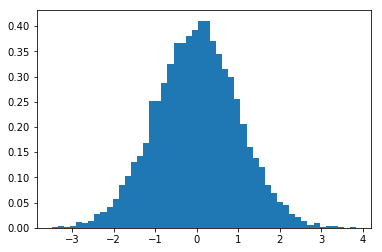

In [9]:
# Plot a histogram, approximating the density

plt.hist(normal.sample(10000), bins=50, density=True)
plt.show()

#### Work with batch distributions - Key here is to just get familiar with batch_shape and event_shape of the distribution objects. It's simple here but later on they make it very tricky when they start drawing samples from distributions that have > 1 batch shape AND > 1 event shape. 

In [6]:
# Create a batched Bernoulli distribution

bernoulli_batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [7]:
# Sample from it, noting the shape

bernoulli_batch

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>

In [8]:
# Use a batch shape with higher rank

probs = [[[1, .5], 
          [1, 0], 
          [1, 0]]]
bernoulli_batch_2D = tfd.Bernoulli(probs=probs)
bernoulli_batch_2D

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[1, 3, 2] event_shape=[] dtype=int32>

In [9]:
# Sample from this batch of distributions

bernoulli_batch_2D.sample(2)

<tf.Tensor: shape=(2, 1, 3, 2), dtype=int32, numpy=
array([[[[1, 1],
         [1, 0],
         [1, 0]]],


       [[[1, 0],
         [1, 0],
         [1, 0]]]])>

In [10]:
# Determine probabilities from this batch distribution

bernoulli_batch_2D.prob([[[1, 0], 
                         [0, 0], 
                         [1, 1]]])

<tf.Tensor: shape=(1, 3, 2), dtype=float32, numpy=
array([[[1. , 0.5],
        [0. , 1. ],
        [1. , 0. ]]], dtype=float32)>

***
<a id='multivariate_distributions'></a>
## Multivariate Distributions


#### Basic multivariate distributions - This is where it starts to get a bit tricky. The following example is easy but they build off it.

In [11]:
# Define 2D multivariate Gaussian with diagonal covariance matrix

normal_diag = tfd.MultivariateNormalDiag(loc=[0,0],scale_diag=[1,1.5])


In [12]:
# Sample from it

normal_diag.sample(2)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.33875433,  0.5174792 ],
       [-0.6605785 , -0.4282491 ]], dtype=float32)>

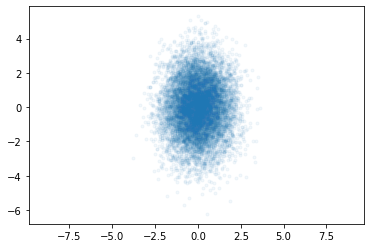

In [14]:
# Make a plot

plt_sample = normal_diag.sample(10000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.show()

#### Batches of multivariate distributions - ok here the mind bending starts.

In [15]:
# Create three "batches" of multivariate normals

multi = tfd.MultivariateNormalDiag(loc=[[0,0],[0,1],[1,0]],scale_diag=[[1,1],[1,1],[1,2]])

In [16]:
# Sample from it

multi.sample(5)

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[-0.25055045,  1.601835  ],
        [-0.08064709,  2.690009  ],
        [ 1.6962727 ,  0.8765621 ]],

       [[-0.02178756,  0.7157107 ],
        [-0.80817044,  2.4445796 ],
        [ 1.3187631 , -0.30178973]],

       [[-1.0427645 , -0.39272586],
        [-1.1174989 ,  0.4468134 ],
        [ 2.0929604 ,  1.9198587 ]],

       [[-1.836093  ,  1.8437709 ],
        [ 1.4887183 ,  0.66727316],
        [ 2.8107936 ,  2.954134  ]],

       [[-0.8985954 , -1.8755535 ],
        [ 0.96841604,  0.2874148 ],
        [ 1.3659389 ,  3.1459255 ]]], dtype=float32)>

In [17]:
# Compute log probs

multi.log_prob([[-0.0969347 ,  0.07095173],
               [-0.0969347 ,  0.07095173],
               [-0.0969347 ,  0.07095173]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.8450923, -2.2741406, -3.1332862], dtype=float32)>

In [18]:
# Create a sample for a plot -- notice the shape





***
<a id='the_independent_distribution'></a>
## The Independent Distribution - I would recommend watching the tutorial for this. Its confusing. The section is called "The Independent Distribution"

In [19]:
# Start by defining a batch of two univariate Gaussians, then
# combine them into a bivariate Gaussian with independent components

In [20]:
locs = [0,1]
scales = [1,1]

In [21]:
batch_of_normals = tfd.Normal(loc=[0,1],scale=[1,1])

In [22]:
batch_of_normals.sample(5)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[-1.1120325 ,  1.3627782 ],
       [-1.7191917 , -0.5694467 ],
       [ 0.71032196,  2.2278419 ],
       [ 0.58816636,  1.2424176 ],
       [-1.0549843 ,  3.2705615 ]], dtype=float32)>

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


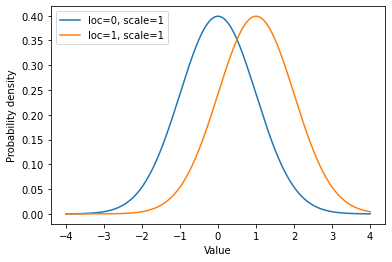

In [23]:
# Univariate density functions

import seaborn as sns

t = np.linspace(-4, 4, 1000)
densities = batch_of_normals.prob(np.repeat(t[:, np.newaxis], 2, axis=1)) # each column is a vector of densities for one distn

sns.lineplot(t, densities[:, 0], label='loc={}, scale={}'.format(locs[0], scales[0]))
sns.lineplot(t, densities[:, 1], label='loc={}, scale={}'.format(locs[1], scales[1]))
plt.ylabel('Probability density')
plt.xlabel('Value')
plt.legend()
plt.show()

In [24]:
# Check their batch_shape and event_shape
batch_of_normals


<tfp.distributions.Normal 'Normal' batch_shape=[2] event_shape=[] dtype=float32>

In [25]:
# Use Independent to convert the batch shape to the event shape

bivariate_normal_from_independent = tfd.Independent(batch_of_normals,reinterpreted_batch_ndims=1)

In [26]:
# Note that dimension from batch_shape has shifted to event_shape

bivariate_normal_from_independent

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[] event_shape=[2] dtype=float32>

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


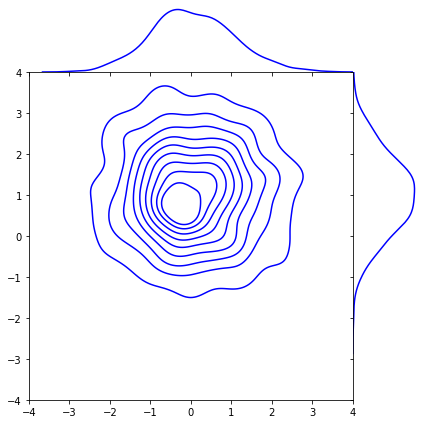

In [27]:
# Create a plot showing joint density contours and marginal density functions

samples = bivariate_normal_from_independent.sample(1000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

In [28]:
# Use MultivariateNormalDiag to create the equivalent distribution
# Note that diagonal covariance matrix => no correlation => independence (for the multivariate normal distribution)

bivariate_normal_from_Multivariate = tfd.MultivariateNormalDiag(loc=locs,scale_diag=scales)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


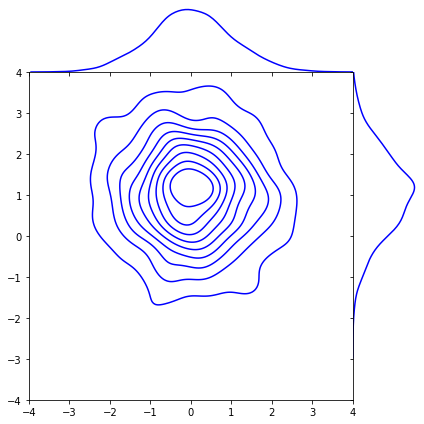

In [29]:
# Plot the joint density function of bivariate_normal_from_Independent
# Refer back to bivariate_normal_from_Independent to show that the plot is the same
# Summarise how Independent has been used

samples = bivariate_normal_from_Multivariate.sample(1000)
x1 = samples[:, 0]
x2 = samples[:, 1]
sns.jointplot(x1, x2, kind="kde", space=0, color='b', xlim=[-4, 4], ylim=[-4, 4])

#### Shifting batch dimensions to event dimensions using 
`reinterpreted_batch_ndims`

In [32]:
# Demonstrate use of reinterpreted_batch_ndims
# By default all batch dims except the first are transferred to event dims

loc_grid = [[-100., -100.],
            [100., 100.],
            [0., 0.]]
scale_grid = [[1., 10.],
              [1., 10.],
              [1., 1.]]

normals_batch_3by2_event_1 = tfd.Normal(loc=loc_grid, scale=scale_grid)

In [33]:
# Highlight batch_shape

normals_batch_3by2_event_1.batch_shape

TensorShape([3, 2])

In [34]:
# We now have a batch of 3 bivariate normal distributions,
# each parametrised by a column of our original parameter grid

normals_batch_3by2_event_1_Independent = tfd.Independent(normals_batch_3by2_event_1)
normals_batch_3by2_event_1_Independent

<tfp.distributions.Independent 'IndependentNormal' batch_shape=[3] event_shape=[2] dtype=float32>

In [35]:
# Evaluate log_prob

normals_batch_3by2_event_1_Independent.log_prob([2,4])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-5260.2207  , -4852.2207  ,   -11.837877], dtype=float32)>